<a href="https://colab.research.google.com/github/vaishnavi7899/Direct-marketing-campaign/blob/master/directmarketingcamapaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT LIBRARIES

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns



IMPORT DATASET INTO X AND Y WHERE THEY ARE INDEPENDENT AND DEPENDENT VARIABLE RESPECTIVELY 

In [ ]:
dataset= pd.read_csv('bankfinal.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
print(X)
print(y)



[[30 'unemployed' 'married' ... -1 0 'unknown']
 [33 'services' 'married' ... 339 4 'failure']
 [35 'management' 'single' ... 330 1 'failure']
 ...
 [57 'technician' 'married' ... -1 0 'unknown']
 [28 'blue-collar' 'married' ... 211 3 'other']
 [44 'entrepreneur' 'single' ... 249 7 'other']]
['no' 'no' 'no' ... 'no' 'no' 'no']


ENCODING THE CATEGORICAL DATA AMONG THE INDEPENDENT VARIABLES

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder',OneHotEncoder(),[1,2,3,4,6,7,8,10,15])], remainder='passthrough')
X = np.array(ct.fit_transform(X)) 

ENCODING THE CATEGORICAL DATA IN THE DEPENDENT VARIABLE

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[0 0 0 ... 0 0 0]


SPLIT INTO TRAINING AND TESTING DATA

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

print(X_train)

print(X_test)

print(y_test)

print(y_train)

[[0.0 0.0 0.0 ... 9 -1 0]
 [0.0 1.0 0.0 ... 3 357 1]
 [0.0 1.0 0.0 ... 1 -1 0]
 ...
 [0.0 1.0 0.0 ... 3 181 1]
 [0.0 1.0 0.0 ... 1 -1 0]
 [0.0 0.0 0.0 ... 2 -1 0]]
[[0.0 1.0 0.0 ... 3 -1 0]
 [0.0 0.0 0.0 ... 2 -1 0]
 [0.0 0.0 0.0 ... 1 -1 0]
 ...
 [0.0 0.0 0.0 ... 12 -1 0]
 [0.0 0.0 1.0 ... 2 -1 0]
 [0.0 1.0 0.0 ... 6 -1 0]]
[0 0 0 ... 0 1 0]
[0 0 0 ... 1 0 0]


FEATURE SCALING

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

print(X_test)

print(X_train)


[[-0.34129999  1.94220285 -0.21052632 ...  0.06290744 -0.40639282
  -0.31982753]
 [-0.34129999 -0.51487928 -0.21052632 ... -0.24643305 -0.40639282
  -0.31982753]
 [-0.34129999 -0.51487928 -0.21052632 ... -0.55577353 -0.40639282
  -0.31982753]
 ...
 [-0.34129999 -0.51487928 -0.21052632 ...  2.8469718  -0.40639282
  -0.31982753]
 [-0.34129999 -0.51487928  4.75       ... -0.24643305 -0.40639282
  -0.31982753]
 [-0.34129999  1.94220285 -0.21052632 ...  0.99092889 -0.40639282
  -0.31982753]]
[[-0.34469099 -0.51425049 -0.19156526 ...  2.02375834 -0.40752621
  -0.32060803]
 [-0.34469099  1.94457765 -0.19156526 ...  0.06760928  3.14616887
   0.26943606]
 [-0.34469099  1.94457765 -0.19156526 ... -0.5844404  -0.40752621
  -0.32060803]
 ...
 [-0.34469099  1.94457765 -0.19156526 ...  0.06760928  1.3991009
   0.26943606]
 [-0.34469099  1.94457765 -0.19156526 ... -0.5844404  -0.40752621
  -0.32060803]
 [-0.34469099 -0.51425049 -0.19156526 ... -0.25841556 -0.40752621
  -0.32060803]]


TRAINING THE LOGISTIC REGRESSION MODEL ON TRAINING SET

In [ ]:

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

PREDICTING TEST RESULT

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 1]
 [0 0]]


CONFUSION MATRIX

In [ ]:

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)


[[971  22]
 [ 94  44]]


0.8974358974358975

In [ ]:
a = accuracy_score(y_test,y_pred)*100
print('The accuracy of the model is:')
print(a)


The accuracy of the model is:
89.74358974358975


UNDERSTANDING QUANTITIVE VARIABLES OF DATASET

In [ ]:
dataset.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [ ]:
dataset.corr()



,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.083820,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511
balance,0.083820,1.000000,-0.008677,-0.015950,-0.009976,0.009437,0.026196
day,-0.017853,-0.008677,1.000000,-0.024629,0.160706,-0.094352,-0.059114
duration,-0.002367,-0.015950,-0.024629,1.000000,-0.068382,0.010380,0.018080
campaign,-0.005148,-0.009976,0.160706,-0.068382,1.000000,-0.093137,-0.067833
pdays,-0.008894,0.009437,-0.094352,0.010380,-0.093137,1.000000,0.577562
previous,-0.003511,0.026196,-0.059114,0.018080,-0.067833,0.577562,1.000000


HEATMAP USING SEABORN

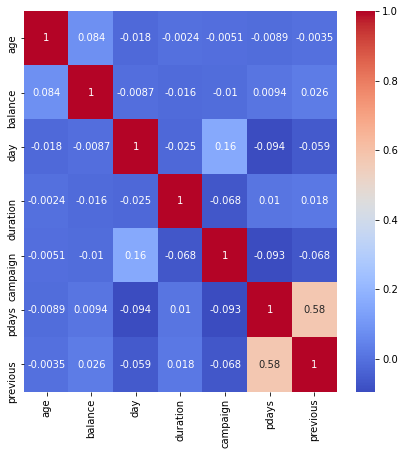

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(dataset.corr() , annot=True , cmap= 'coolwarm')